<font size="+3"><strong>Linear Regression with Time Series Data</strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import pytz
from IPython.display import VimeoVideo
from pymongo import MongoClient
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
VimeoVideo("665412117", h="c39a50bd58", width=600)

# Prepare Data

## Import

In [ ]:
VimeoVideo("665412469", h="135f32c7da", width=600)

**Task 3.2.1:** Complete to the create a client to connect to the MongoDB server, assign the `"air-quality"` database to `db`, and assign the `"nairobi"` connection to `nairobi`.

- [<span id='technique'>Create a client object for a <span id='tool'>MongoDB</span> instance.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients) 
- [<span id='technique'>Access a database using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients)
- [<span id='technique'>Access a collection in a database using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Collections)

In [3]:
client = MongoClient(host="localhost", port=27017)
db = client["air-quality"]
nairobi = db["nairobi"]

In [ ]:
VimeoVideo("665412480", h="c20ed3e570", width=600)

**Task 3.2.2:** Complete the `wrangle` function below so that the `results` from the database query are read into the DataFrame `df`. Be sure that the index of `df` is the `"timestamp"` from the results. 

- [<span id='technique'>Create a DataFrame from a dictionary using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [18]:
def wrangle(collection):
    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
        projection={"P2": 1, "timestamp": 1, "_id": 0},
    )

    df = pd.DataFrame(results).set_index("timestamp")
    df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
    return df

In [ ]:
VimeoVideo("665412496", h="d757475f7c", width=600)

**Task 3.2.3:** Use your wrangle function to read the data from the `nairobi` collection into the DataFrame `df`.

In [19]:
df = wrangle(nairobi)
df.head()

,P2
timestamp,
2018-09-01 03:00:02.472000+03:00,34.43
2018-09-01 03:05:03.941000+03:00,30.53
2018-09-01 03:10:04.374000+03:00,22.80
2018-09-01 03:15:04.245000+03:00,13.30
2018-09-01 03:20:04.869000+03:00,16.57


In [6]:
# Check your work
assert any([isinstance(df, pd.DataFrame), isinstance(df, pd.Series)])
assert len(df) <= 32907
assert isinstance(df.index, pd.DatetimeIndex)

In [7]:
VimeoVideo("665412520", h="e03eefff07", width=600)

**Task 3.2.4:** Add to your `wrangle` function so that the `DatetimeIndex` for `df` is localized to the correct timezone, `"Africa/Nairobi"`. Don't forget to re-run all the cells above after you change the function. 

- [<span id='technique'>Localize a timestamp to another timezone using <span id='tool'>pandas.](../%40textbook/17-ts-models.ipynb#Localizing-the-Timezone)

In [20]:
df.index[:5] #df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")

DatetimeIndex(['2018-09-01 03:00:02.472000+03:00',
               '2018-09-01 03:05:03.941000+03:00',
               '2018-09-01 03:10:04.374000+03:00',
               '2018-09-01 03:15:04.245000+03:00',
               '2018-09-01 03:20:04.869000+03:00'],
              dtype='datetime64[ns, Africa/Nairobi]', name='timestamp', freq=None)

In [21]:
# Check your work
assert df.index.tzinfo == pytz.timezone("Africa/Nairobi")

## Explore

In [ ]:
VimeoVideo("665412546", h="97792cb982", width=600)

**Task 3.2.5:** Create a boxplot of the `"P2"` readings in `df`. 

- [<span id='technique'>Create a boxplot using <span id='tool'>pandas.](../%40textbook/06-visualization-matplotlib.ipynb#Boxplots)

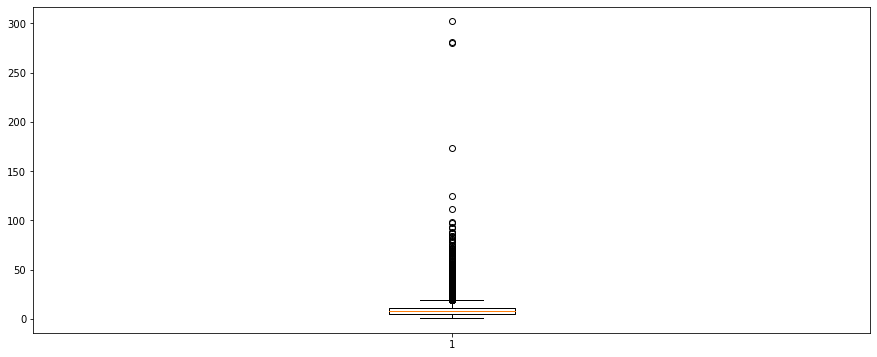

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))

ax = plt.boxplot(df["P2"])

In [ ]:
VimeoVideo("665412573", h="b46049021b", width=600)

**Task 3.2.6:** Add to your `wrangle` function so that all `"P2"` readings above 500 are dropped from the dataset. Don't forget to re-run all the cells above after you change the function. 

- [<span id='technique'>Subset a DataFrame with a mask using <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subsetting-with-Masks)

In [25]:
def wrangle(collection):
    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
        projection={"P2": 1, "timestamp": 1, "_id": 0},
    )

    df = pd.DataFrame(results).set_index("timestamp")
    df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
    df = df[df["P2"] <= 500]
    
    return df

In [29]:
df = wrangle(nairobi)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32906 entries, 2018-09-01 03:00:02.472000+03:00 to 2019-01-01 02:55:04.811000+03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P2      32906 non-null  float64
dtypes: float64(1)
memory usage: 514.2 KB


In [28]:
# Check your work
assert len(df) <= 32906

In [33]:
VimeoVideo("665412594", h="e56c2f6839", width=600)

**Task 3.2.7:** Create a time series plot of the `"P2"` readings in `df`.

- [<span id='technique'>Create a line plot using <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

<AxesSubplot:xlabel='Time', ylabel='P2'>

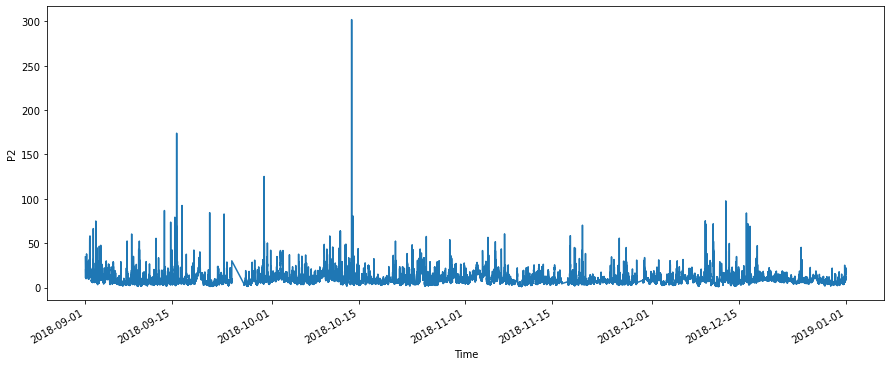

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))

df["P2"].plot(
    # can use y = "P2", x = index implicitly
    xlabel="Time",
    ylabel="P2",
    label="line plot",
)

In [ ]:
VimeoVideo("665412601", h="a16c5a73fc", width=600)

**Task 3.2.8:** Add to your `wrangle` function to resample `df` to provide the mean `"P2"` reading for each hour. Use a forward fill to impute any missing values. Don't forget to re-run all the cells above after you change the function. 

- [<span id='technique'>Resample time series data in <span id='tool'>pandas.](../%40textbook/17-ts-models.ipynb#Resampling-Data)
- [<span id='technique'>Impute missing time series values using <span id='tool'>pandas.](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Imputation)

In [36]:
def wrangle(collection):
    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
        projection={"P2": 1, "timestamp": 1, "_id": 0},
    )

    df = pd.DataFrame(results).set_index("timestamp")
    df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
    df = df[df["P2"] <= 500]
    df = df["P2"].resample("1H").mean().fillna(method="ffill").to_frame()
    return df

In [37]:
df = wrangle(nairobi)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2928 entries, 2018-09-01 03:00:00+03:00 to 2019-01-01 02:00:00+03:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P2      2928 non-null   float64
dtypes: float64(1)
memory usage: 45.8 KB


In [38]:
# Check your work
assert len(df) <= 2928

In [ ]:
VimeoVideo("665412649", h="d2e99d2e75", width=600)

**Task 3.2.9:** Plot the rolling average of the `"P2"` readings in `df`. Use a window size of `168` (the number of hours in a week).

- [What's a <span id='term'>rolling average?](../%40textbook/16-ts-core.ipynb#Rolling-Averages)
- [<span id='technique'>Calculate a rolling average in <span id='tool'>pandas.](../%40textbook/17-ts-models.ipynb#Making-a-Line-Plot-with-Rolling-Averages)
- [<span id='technique'>Create a line plot using <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

<AxesSubplot:xlabel='timestamp'>

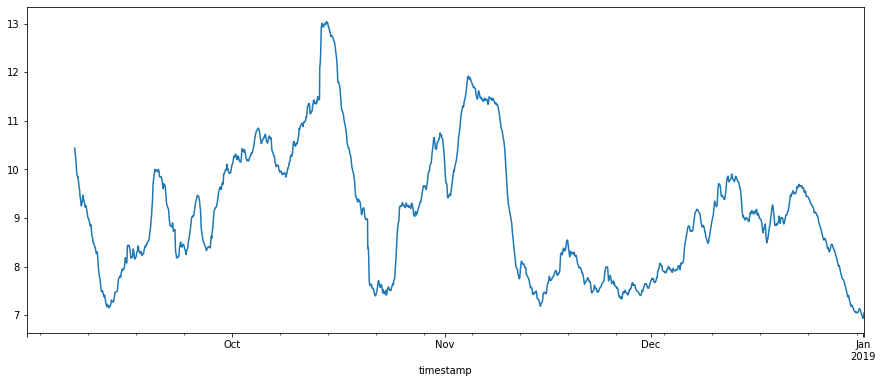

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P2"].rolling(168).mean().plot(ax=ax)

In [40]:
VimeoVideo("665412693", h="c3bca16aff", width=600)

In [ ]:
def wrangle(collection):
    results = collection.find(
        {"metadata.site": 29, "metadata.measurement": "P2"},
        projection={"P2": 1, "timestamp": 1, "_id": 0},
    )

    df = pd.DataFrame(results).set_index("timestamp")
    df.index = df.index.tz_localize("UTC").tz_convert("Africa/Nairobi")
    df = df[df["P2"] <= 500]
    df = df["P2"].resample("1H").mean().fillna(method="ffill").to_frame()
    
    df["P2.L1"] = df["P2"].shift(1) # engineer features to predict pm2.5 readings
    # target is P2, feature is P2.L1
    # 
    df = df.dropna()
    return df

**Task 3.2.10:** Add to your `wrangle` function to create a column called `"P2.L1"` that contains the mean`"P2"` reading from the previous hour. Since this new feature will create `NaN` values in your DataFrame, be sure to also drop null rows from `df`.

- [<span id='technique'>Shift the index of a Series in <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns)
- [<span id='technique'>Drop rows with missing values from a DataFrame using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Dropping-Columns)

In [ ]:
# Check your work
assert len(df) <= 11686
assert df.shape[1] == 2

In [ ]:
VimeoVideo("665412732", h="059e4088c5", width=600)

**Task 3.2.11:** Create a correlation matrix for `df`.

- [<span id='technique'>Create a correlation matrix in <span id='tool'>pandas.](../%40textbook/07-visualization-pandas.ipynb#Correlation-Matrices)

In [ ]:
VimeoVideo("665412741", h="7439cb107c", width=600)

**Task 3.2.12:** Create a scatter plot that shows PM 2.5 mean reading for each our as a function of the mean reading from the previous hour. In other words, `"P2.L1"` should be on the x-axis, and `"P2"` should be on the y-axis. Don't forget to label your axes!

- [<span id='technique'>Create a scatter plot using <span id='tool'>Matplotlib.](../%40textbook/06-visualization-matplotlib.ipynb#Scatter-Plots)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))


## Split

In [ ]:
VimeoVideo("665412762", h="a5eba496f7", width=600)

**Task 3.2.13:** Split the DataFrame `df` into the feature matrix `X` and the target vector `y`. Your target is `"P2"`.

- [<span id='technique'>Subset a DataFrame by selecting one or more columns in <span id='tool'>pandas.](../%40textbook/04-pandas-advanced.ipynb#Subset-a-DataFrame-by-Selecting-One-or-More-Columns) 
- [<span id='technique'>Select a Series from a DataFrame in <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns) 

In [ ]:
target = "P2"
y = ...
X = ...

In [ ]:
VimeoVideo("665412785", h="03118eda71", width=600)

**Task 3.2.14:** Split `X` and `y` into training and test sets. The first 80% of the data should be in your training set. The remaining 20% should be in the test set.

- [<span id='technique'>Divide data into training and test sets in <span id='tool'>pandas.](../%40textbook/14-ml-classification.ipynb#Randomized-Train-Test-split)

In [ ]:
cutoff = ...

X_train, y_train = ...
X_test, y_test = ...

# Build Model

## Baseline

**Task 3.2.15:** Calculate the baseline mean absolute error for your model.

- [<span id='technique'>Calculate summary statistics for a DataFrame or Series in <span id='tool'>pandas.](../%40textbook/05-pandas-summary-statistics.ipynb#Summary-Statistics)

In [ ]:
y_pred_baseline = ...
mae_baseline = ...

print("Mean P2 Reading:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

## Iterate

**Task 3.2.16:** Instantiate a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model named `model`, and fit it to your training data.

- [<span id='technique'>Instantiate a predictor in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)
- [<span id='technique'>Fit a model to training data in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Fitting-a-Model-to-Training-Data)

In [ ]:
model = ...


## Evaluate

In [ ]:
VimeoVideo("665412844", h="129865775d", width=600)

**Task 3.2.17:** Calculate the training and test mean absolute error for your model.

- [<span id='technique'>Generate predictions using a trained model in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Generating-Predictions-Using-a-Trained-Model)
- [<span id='technique'>Calculate the mean absolute error for a list of predictions in <span id='tool'>scikit-learn.](../%40textbook/15-ml-regression.ipynb#Calculating-the-Mean-Absolute-Error-for-a-List-of-Predictions)

In [ ]:
training_mae = ...
test_mae = ...
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

# Communicate Results

**Task 3.2.18:** Extract the intercept and coefficient from your `model`. 

- [<span id='technique'>Access an object in a pipeline in <span id='tool'>scikit-learn](../%40textbook/13-ml-data-pre-processing-and-production.ipynb#Accessing-an-Object-in-a-Pipeline)

In [ ]:
intercept = ...
coefficient = ...

print(f"P2 = {intercept} + ({coefficient} * P2.L1)")

In [ ]:
VimeoVideo("665412870", h="318d69683e", width=600)

**Task 3.2.19:** Create a DataFrame `df_pred_test` that has two columns: `"y_test"` and `"y_pred"`. The first should contain the true values for your test set, and the second should contain your model's predictions. Be sure the index of `df_pred_test` matches the index of `y_test`.

- [<span id='technique'>Create a DataFrame from a dictionary using <span id='tool'>pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)

In [ ]:
df_pred_test = ...
df_pred_test.head()

In [ ]:
VimeoVideo("665412891", h="39d7356a26", width=600)

**Task 3.2.20:** Create a time series line plot for the values in `test_predictions` using plotly express. Be sure that the y-axis is properly labeled as `"P2"`.

- [<span id='technique'>Create a line plot using <span id='tool'>plotly express.](../%40textbook/07-visualization-pandas.ipynb#Line-Plots)

In [ ]:
fig = ...
fig.show()

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
